In [1]:
from multi_path_base import *

In [2]:
#Increasing number of paths M

real_1 = real(1,0.1)

N=100
dt=1

M_test=np.array((2,4,10,100,500,1000)) #,500,10000

models_M=[]
error_M=np.zeros((len(M_test),2))
for j in range(0,len(M_test)):

    disct_temp = disct(N,dt,M_test[j])
        
    X=gen_path_model_moments(X0=0, disct=disct_temp,real=real_1 )
        
    this_model=model_moments(disct_temp,X )
    this_model.optimize()
        
    error_M[j]=this_model.get_error(real_1)
    
    del this_model
    #models_M.append(this_model)
    

/Users/alhaddwt/Dropbox/GitLab/wind-power/python_code/multi_path_base.py:277: RuntimeWarning: overflow encountered in double_scalars
  L_n = L_n  - ( X[j,i] - a   )**2/(2*b**2) -0.5*np.log(2*math.pi*b**2) #  removed dt from both terms
/Users/alhaddwt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/alhaddwt/Dropbox/GitLab/wind-power/python_code/multi_path_base.py:276: RuntimeWarning: invalid value encountered in double_scalars
  a =  X[j,i-1]*np.exp(- dt*theta)   #mu*( 0.5 + 0.5*np.sin(i/N * 2*math.pi) - X[j,i-1])
/Users/alhaddwt/Dropbox/GitLab/wind-power/python_code/multi_path_base.py:277: RuntimeWarning: invalid value encountered in double_scalars
  L_n = L_n  - ( X[j,i] - a   )**2/(2*b**2) -0.5*np.log(2*math.pi*b**2) #  removed dt from both terms


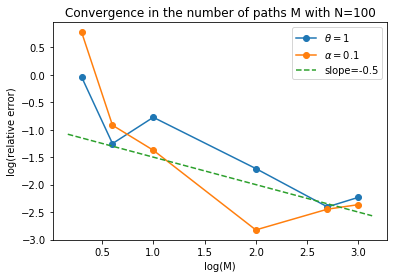

In [3]:
plt.title('Convergence in the number of paths M with N=100')
plt.xlabel('log(M)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(M_test),  np.log10(error_M[:,0]),'-o', label='$\\theta=1$')
plt.plot(np.log10(M_test),  np.log10(error_M[:,1]) ,'-o', label='$\\alpha=0.1$')
abline(-0.5,-1)
plt.legend()
plt.savefig('conv_M_moments_constant_func_1_01.pdf')

In [4]:
#Increasing number of samples N


N_test=np.array((10,50, 100,500,1000)) #,5000,10000

#N_test=np.array((10,100,500))

M=100

dt=1

models_N=[]
error_N=np.zeros((len(N_test),2))

for i in range(0,len(N_test)):
        
    disct_temp = disct(N_test[i],dt,M)
        
    X=gen_path_model_moments(X0=0, disct=disct_temp,real=real_1 )
        
    this_model=model_moments(disct_temp,X )
    this_model.optimize()
        
    error_N[i]=this_model.get_error(real_1)
    
    del this_model
    #models_N.append(this_model)

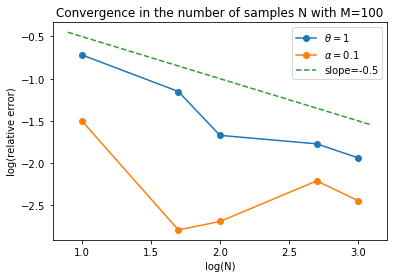

In [5]:
plt.title('Convergence in the number of samples N with M=100')
plt.xlabel('log(N)')
plt.ylabel('log(relative error)')
plt.plot(np.log10(N_test),  np.log10(error_N[:,0]), '-o',label='$\\theta=1$')
plt.plot(np.log10(N_test),  np.log10(error_N[:,1]) ,'-o', label='$\\alpha=0.1$')
abline(-0.5,0.0)
plt.legend()
plt.savefig('conv_N_moments_constant_fun_1_01.pdf')